In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage import color
%matplotlib inline

In [289]:
df_train = pd.read_json('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/train_data.json', lines=True)

In [290]:
# This data set has information about the images
df_train.head()

image_url           image_path  \
0  https://m.media-amazon.com/images/I/81XKaSKvly...  images/train/0.jpeg   
1  https://m.media-amazon.com/images/I/91dDMDg+QT...  images/train/1.jpeg   
2  https://m.media-amazon.com/images/I/71TJ9p46PV...  images/train/2.jpeg   
3  https://m.media-amazon.com/images/I/81Y+je7CEg...  images/train/3.jpeg   
4  https://m.media-amazon.com/images/I/61B8o9Ulqp...  images/train/4.jpeg   

         brand                                      product_title class_label  \
0    Womanista  Women's Georgette Saree with Blouse Piece (TKI...       saree   
1      Yashika         Women Linen Printed Sarees Free Size (BEE)       saree   
2    Womanista  Organza Floral Print Saree with Blouse Piece(W...       saree   
3  PERFECTBLUE  Women's Digital Cotton Linen Blend Saree with ...       saree   
4   VAIVIDHYAM  Designer Sarees Women's Banarasi Cotton Silk S...       saree   

  color  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [291]:
df_train.tail()

image_url  \
91161  https://rukminim1.flixcart.com/image/309/371/k...   
91162  https://rukminim1.flixcart.com/image/309/371/k...   
91163  https://rukminim1.flixcart.com/image/309/371/k...   
91164  https://rukminim1.flixcart.com/image/309/371/k...   
91165  https://rukminim1.flixcart.com/image/309/371/k...   

                    image_path           brand  \
91161  images/train/91161.jpeg         AURELIA   
91162  images/train/91162.jpeg  Prime clothing   
91163  images/train/91163.jpeg           Vrisa   
91164  images/train/91164.jpeg   HELLEN VELLEN   
91165  images/train/91165.jpeg     NEW STYLISH   

                                        product_title  class_label       color  
91161        Women Printed Pure Cotton Straight Kurta  women_kurta        Blue  
91162     Women Checkered Cotton Blend Straight Kurta  women_kurta       White  
91163      Women Embroidered Georgette Straight Kurta  women_kurta       White  
91164                Women Printed Rayon A-line Kurta  women_kurta   Dark Blue  
91165  Women Printed Rayon Crepe Blend Straight Kurta  women_kurta  Dark Green

In [292]:
df_train.columns

Index(['image_url', 'image_path', 'brand', 'product_title', 'class_label',
       'color'],
      dtype='object')

In [293]:
df_train.class_label.value_counts()

women_kurta             11694
saree                   10791
blouse                   9174
leggings_and_salwars     7787
kurta_men                6951
dupattas                 6587
nehru_jackets            6491
lehenga                  5753
gowns                    5211
petticoats               4441
dhoti_pants              4145
palazzos                 3375
mojaris_women            3228
sherwanis                2992
mojaris_men              2546
Name: class_label, dtype: int64

In [294]:
# Confirming number of training images
len(df_train)

91166

In [295]:
df_test = pd.read_json('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/test_data.json', lines=True)

In [296]:
# This data set has information about the images
df_test.head()

image_url          image_path  \
0  https://m.media-amazon.com/images/I/71NZQ-aaAS...  images/test/0.jpeg   
1  https://m.media-amazon.com/images/I/81aQmbWsG7...  images/test/1.jpeg   
2  https://m.media-amazon.com/images/I/71YjGvzs9y...  images/test/2.jpeg   
3  https://m.media-amazon.com/images/I/81JYhYV5Xr...  images/test/3.jpeg   
4  https://m.media-amazon.com/images/I/91fXc5i5Dy...  images/test/4.jpeg   

                     brand                                      product_title  \
0  TANTUJA BENGAL HANDLOOM  (A Govt. of West Bengal Enterprises) Handloom ...   
1               Trilok Fab               Women's Silk Saree With Blouse Piece   
2              Nine Sister  Women's Georgette Net Embroidered Saree with B...   
3   Gauri Laxmi Enterprise  Women's Crepe Saree with Blouse (GLE$CHICKOO C...   
4                   SOURBH  Women's Cotton Blend Digital Butta Printed Sar...   

  class_label color  
0       saree   NaN  
1       saree   NaN  
2       saree   NaN  
3       saree   NaN  
4       saree   NaN

In [297]:
# Confirming number of test images
len(df_test)

7500

In [298]:
df_val = pd.read_json('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/val_data.json', lines=True)

In [299]:
# This data set has information about the images
df_val.head()

image_url         image_path  \
0  https://m.media-amazon.com/images/I/81LOPbFPiQ...  images/val/0.jpeg   
1  https://m.media-amazon.com/images/I/81Q8Oktw4s...  images/val/1.jpeg   
2  https://m.media-amazon.com/images/I/613S1YGCmo...  images/val/2.jpeg   
3  https://m.media-amazon.com/images/I/819budhQl1...  images/val/3.jpeg   
4  https://m.media-amazon.com/images/I/61cAZ94ZQV...  images/val/4.jpeg   

             brand                                      product_title  \
0          Generic  Women's Khadi Cotton Saree With Blouse Piece (...   
1  Yashvi Designer     Women's Net Saree With Unstitched Blouse Piece   
2           Aarrah  Georgette Strip Print Saree[S_SHIKHA30021SR02_...   
3           MIMOSA        Women's Patola Style Art Silk Saree (Green)   
4          Generic  Women's Pure Hand Block Patola Printed Cotton ...   

  class_label color  
0       saree   NaN  
1       saree   NaN  
2       saree   NaN  
3       saree   NaN  
4       saree   NaN

In [300]:
# Confirming number of validation images
len(df_val)

7500

## Exploring the pictures and sizes of images of women kurtas

In [301]:
df_train[df_train.class_label == 'women_kurta']

image_url  \
79472  https://m.media-amazon.com/images/I/618CNsT6-J...   
79473  https://m.media-amazon.com/images/I/41TTUtJuFY...   
79474  https://m.media-amazon.com/images/I/61vaSYjhHp...   
79475  https://m.media-amazon.com/images/I/51lqHgSvPj...   
79476  https://m.media-amazon.com/images/I/41I8W6YXT+...   
...                                                  ...   
91161  https://rukminim1.flixcart.com/image/309/371/k...   
91162  https://rukminim1.flixcart.com/image/309/371/k...   
91163  https://rukminim1.flixcart.com/image/309/371/k...   
91164  https://rukminim1.flixcart.com/image/309/371/k...   
91165  https://rukminim1.flixcart.com/image/309/371/k...   

                    image_path           brand  \
79472  images/train/79472.jpeg         GoSriKi   
79473  images/train/79473.jpeg         Generic   
79474  images/train/79474.jpeg   ANNI DESIGNER   
79475  images/train/79475.jpeg         GoSriKi   
79476  images/train/79476.jpeg          ASCart   
...                        ...             ...   
91161  images/train/91161.jpeg         AURELIA   
91162  images/train/91162.jpeg  Prime clothing   
91163  images/train/91163.jpeg           Vrisa   
91164  images/train/91164.jpeg   HELLEN VELLEN   
91165  images/train/91165.jpeg     NEW STYLISH   

                                           product_title  class_label  \
79472  Women's cotton straight Kurta With Checkered T...  women_kurta   
79473  Ajay Swami Adorable Women's Soft Rayon Printed...  women_kurta   
79474  Women's Cotton Straight Kurta with Palazzo Set...  women_kurta   
79475         Women's Cotton Anarkali Kurta With Palazzo  women_kurta   
79476  Star Fashions Women's Rayon A-Line Kurta & Pal...  women_kurta   
...                                                  ...          ...   
91161           Women Printed Pure Cotton Straight Kurta  women_kurta   
91162        Women Checkered Cotton Blend Straight Kurta  women_kurta   
91163         Women Embroidered Georgette Straight Kurta  women_kurta   
91164                   Women Printed Rayon A-line Kurta  women_kurta   
91165     Women Printed Rayon Crepe Blend Straight Kurta  women_kurta   

            color  
79472         NaN  
79473         NaN  
79474         NaN  
79475         NaN  
79476         NaN  
...           ...  
91161        Blue  
91162       White  
91163       White  
91164   Dark Blue  
91165  Dark Green  

[11694 rows x 6 columns]

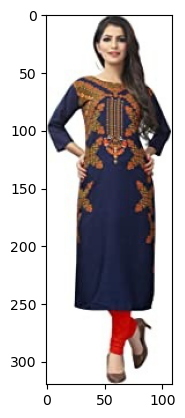

In [302]:
women_kurta1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/90000.jpeg')

_ = plt.imshow(women_kurta1)

In [303]:
women_kurta1.shape

(320, 109, 3)

## Changing color of some images to grayscale to see if using grayscale is feasible in the model

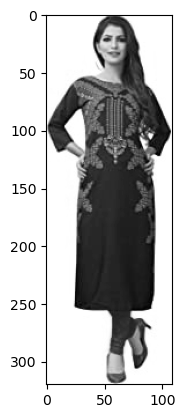

In [304]:
women_kurta1_gray = color.rgb2gray(women_kurta1)
_ = plt.imshow(women_kurta1_gray, cmap='gray')

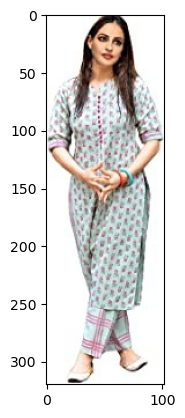

In [305]:
women_kurta2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/79472.jpeg')

_ = plt.imshow(women_kurta2)

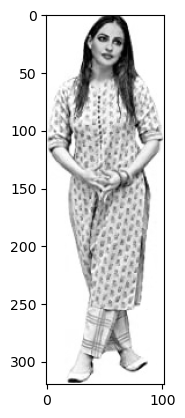

In [306]:
women_kurta2_gray = color.rgb2gray(women_kurta2)
_ = plt.imshow(women_kurta2_gray, cmap='gray')

In [307]:
women_kurta2.shape

(320, 102, 3)

## Exploring the pictures and sizes of images of sarees

In [308]:
df_train[df_train.class_label == 'saree']

image_url  \
0      https://m.media-amazon.com/images/I/81XKaSKvly...   
1      https://m.media-amazon.com/images/I/91dDMDg+QT...   
2      https://m.media-amazon.com/images/I/71TJ9p46PV...   
3      https://m.media-amazon.com/images/I/81Y+je7CEg...   
4      https://m.media-amazon.com/images/I/61B8o9Ulqp...   
...                                                  ...   
10786  https://assets.myntassets.com/h_720,q_90,w_540...   
10787  https://assets.myntassets.com/h_720,q_90,w_540...   
10788  https://assets.myntassets.com/h_720,q_90,w_540...   
10789  https://assets.myntassets.com/h_720,q_90,w_540...   
10790  https://assets.myntassets.com/h_720,q_90,w_540...   

                    image_path        brand  \
0          images/train/0.jpeg    Womanista   
1          images/train/1.jpeg      Yashika   
2          images/train/2.jpeg    Womanista   
3          images/train/3.jpeg  PERFECTBLUE   
4          images/train/4.jpeg   VAIVIDHYAM   
...                        ...          ...   
10786  images/train/10786.jpeg       Mitera   
10787  images/train/10787.jpeg      LADUSAA   
10788  images/train/10788.jpeg       Inddus   
10789  images/train/10789.jpeg       Mitera   
10790  images/train/10790.jpeg   Saree mall   

                                           product_title class_label color  
0      Women's Georgette Saree with Blouse Piece (TKI...       saree   NaN  
1             Women Linen Printed Sarees Free Size (BEE)       saree   NaN  
2      Organza Floral Print Saree with Blouse Piece(W...       saree   NaN  
3      Women's Digital Cotton Linen Blend Saree with ...       saree   NaN  
4      Designer Sarees Women's Banarasi Cotton Silk S...       saree   NaN  
...                                                  ...         ...   ...  
10786              Pink Embroidered Pure Georgette Saree       saree   NaN  
10787         Yellow Poly Chiffon Printed Bandhani Saree       saree   NaN  
10788                         Teal Blue Silk Blend Saree       saree   NaN  
10789            Blue Pure Silk Woven Design Taant Saree       saree   NaN  
10790             Olive Green &amp; Yellow Printed Saree       saree   NaN  

[10791 rows x 6 columns]

In [309]:
saree1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/1.jpeg')

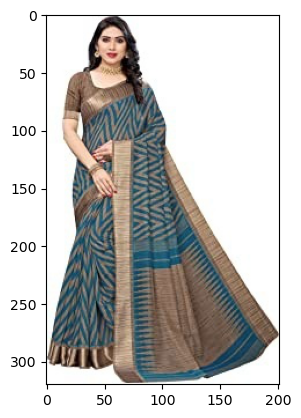

In [310]:
_ = plt.imshow(saree1)

In [311]:
saree1.shape

(320, 201, 3)

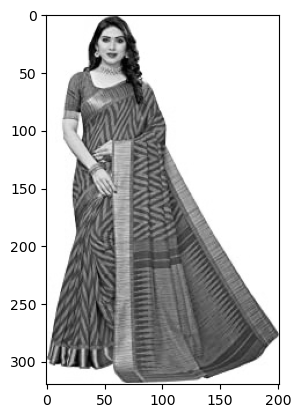

In [312]:
saree1_gray = color.rgb2gray(saree1)
_ = plt.imshow(saree1_gray, cmap='gray')

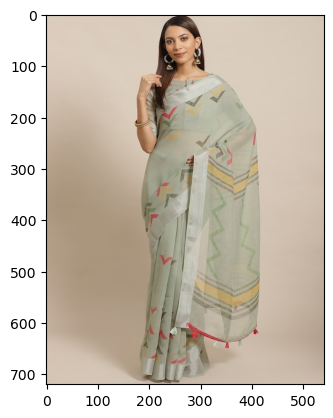

In [313]:
saree2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/10790.jpeg')
_ = plt.imshow(saree2)

In [314]:
saree2.shape

(720, 540, 3)

## Exploring the pictures and sizes of images of blouses

In [315]:
df_train[df_train.class_label == 'blouse']

image_url  \
10791  https://m.media-amazon.com/images/I/612b2ktzzK...   
10792  https://m.media-amazon.com/images/I/51mzZ6Kz-e...   
10793  https://m.media-amazon.com/images/I/61Ouviepyg...   
10794  https://m.media-amazon.com/images/I/91ybbMQdz9...   
10795  https://m.media-amazon.com/images/I/71yKUQMu4+...   
...                                                  ...   
19960  https://rukminim1.flixcart.com/image/309/371/k...   
19961  https://rukminim1.flixcart.com/image/309/371/k...   
19962  https://rukminim1.flixcart.com/image/309/371/k...   
19963  https://rukminim1.flixcart.com/image/309/371/k...   
19964  https://rukminim1.flixcart.com/image/309/371/k...   

                    image_path              brand  \
10791  images/train/10791.jpeg           KANCHNAR   
10792  images/train/10792.jpeg     YAZU LIFESTYLE   
10793  images/train/10793.jpeg    Fressia Fabrics   
10794  images/train/10794.jpeg            Janasya   
10795  images/train/10795.jpeg    Fressia Fabrics   
...                        ...                ...   
19960  images/train/19960.jpeg          MOOLDHANI   
19961  images/train/19961.jpeg           Life win   
19962  images/train/19962.jpeg  HIYANI ENTERPRISE   
19963  images/train/19963.jpeg   Sanmati Creation   
19964  images/train/19964.jpeg               PKYC   

                                           product_title class_label color  
10791             Women's Cotton Solid 3/4 Sleeve Blouse      blouse   NaN  
10792                  Women's Velvet Sleevesless Blouse      blouse   NaN  
10793  Women's Cotton Readymade Saree Blouse Stretcha...      blouse   NaN  
10794  Women's Cotton Lycra Stretchable Readymade Blouse      blouse   NaN  
10795  Women's Stretchable Readymade Saree Blouse Cro...      blouse   NaN  
...                                                  ...         ...   ...  
19960                            Round Neck Women Blouse      blouse   N/A  
19961                            Round Neck Women Blouse      blouse   N/A  
19962                            Round Neck Women Blouse      blouse   N/A  
19963                                V-Neck Women Blouse      blouse   N/A  
19964                             Boat Neck Women Blouse      blouse   N/A  

[9174 rows x 6 columns]

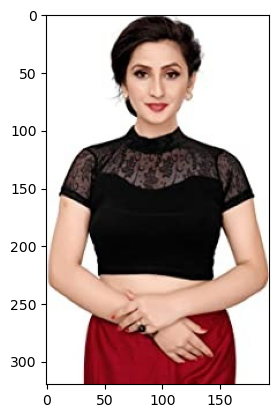

In [316]:
blouse1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/10791.jpeg')
_ = plt.imshow(blouse1)

In [317]:
blouse1.shape

(320, 193, 3)

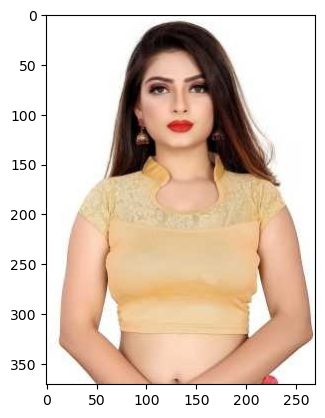

In [318]:
blouse2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/19960.jpeg')
_ = plt.imshow(blouse2)

In [319]:
blouse1.shape

(320, 193, 3)

In [320]:
## Exploring the pictures and sizes of images of leggings and salwars

In [321]:
df_train[df_train.class_label == 'leggings_and_salwars']

image_url  \
42859  https://m.media-amazon.com/images/I/71emZhYvvK...   
42860  https://m.media-amazon.com/images/I/31UbDv7Quk...   
42861  https://m.media-amazon.com/images/I/41xuDLeaUJ...   
42862  https://m.media-amazon.com/images/I/61e2WMxT49...   
42863  https://m.media-amazon.com/images/I/71VBuAI0Cx...   
...                                                  ...   
50641  https://assets.myntassets.com/h_720,q_90,w_540...   
50642  https://assets.myntassets.com/h_720,q_90,w_540...   
50643  https://assets.myntassets.com/h_720,q_90,w_540...   
50644  https://assets.myntassets.com/h_720,q_90,w_540...   
50645  https://assets.myntassets.com/h_720,q_90,w_540...   

                    image_path             brand  \
42859  images/train/42859.jpeg             Pixie   
42860  images/train/42860.jpeg  Prabha Creations   
42861  images/train/42861.jpeg          PI World   
42862  images/train/42862.jpeg           patiala   
42863  images/train/42863.jpeg   KRISHNA FASHION   
...                        ...               ...   
50641  images/train/50641.jpeg                 W   
50642  images/train/50642.jpeg                 W   
50643  images/train/50643.jpeg           De Moza   
50644  images/train/50644.jpeg              Soch   
50645  images/train/50645.jpeg                 W   

                                           product_title  \
42859  Readymade Cotton Patiala Salwar Pants for Wome...   
42860  Cotton patiyala salwar for women (free size; p...   
42861  Women's Cotton Patiala Salwar Free Size Cotton...   
42862           Women's Semi Patiala Salwar With Dupatta   
42863  Women's Cotton Traditional Patiala Salwars (Bl...   
...                                                  ...   
50641           Wishful by Women Beige Churidar Leggings   
50642            Women Turquoise Green Churidar Leggings   
50643                       Blue Solid Churidar Leggings   
50644                      Women Green Churidar Leggings   
50645        Women Sea Green Solid Ankle-Length Leggings   

                class_label color  
42859  leggings_and_salwars   NaN  
42860  leggings_and_salwars   NaN  
42861  leggings_and_salwars   NaN  
42862  leggings_and_salwars   NaN  
42863  leggings_and_salwars   NaN  
...                     ...   ...  
50641  leggings_and_salwars   NaN  
50642  leggings_and_salwars   NaN  
50643  leggings_and_salwars   NaN  
50644  leggings_and_salwars   NaN  
50645  leggings_and_salwars   NaN  

[7787 rows x 6 columns]

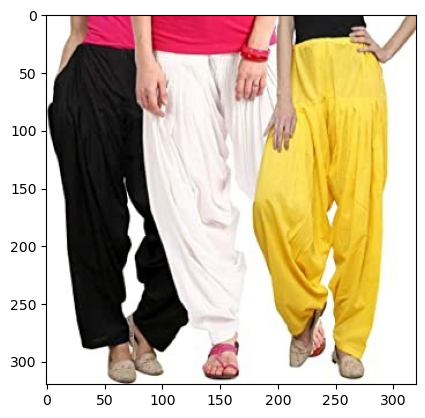

In [322]:
leggings_and_salwars1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/42859.jpeg')
_ = plt.imshow(leggings_and_salwars1)

In [323]:
leggings_and_salwars1.shape

(320, 320, 3)

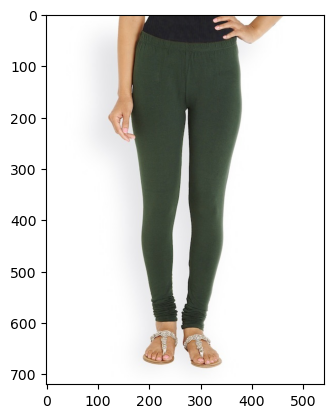

In [324]:
leggings_and_salwars1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/50644.jpeg')
_ = plt.imshow(leggings_and_salwars1)

In [325]:
leggings_and_salwars1.shape

(720, 540, 3)

## Exploring the pictures and sizes of images of kurta_men

In [326]:
df_train[df_train.class_label == 'kurta_men']

image_url  \
35908  https://m.media-amazon.com/images/I/3164uwl5iJ...   
35909  https://m.media-amazon.com/images/I/61f25R890o...   
35910  https://m.media-amazon.com/images/I/710eRIuMTe...   
35911  https://m.media-amazon.com/images/I/714nK0ymt-...   
35912  https://m.media-amazon.com/images/I/61natAA3IQ...   
...                                                  ...   
42854  https://assets.myntassets.com/h_720,q_90,w_540...   
42855  https://assets.myntassets.com/h_720,q_90,w_540...   
42856  https://assets.myntassets.com/h_720,q_90,w_540...   
42857  https://assets.myntassets.com/h_720,q_90,w_540...   
42858  https://assets.myntassets.com/h_720,q_90,w_540...   

                    image_path          brand  \
35908  images/train/35908.jpeg         HOLLOW   
35909  images/train/35909.jpeg       BENSTOKE   
35910  images/train/35910.jpeg       BENSTOKE   
35911  images/train/35911.jpeg       BENSTOKE   
35912  images/train/35912.jpeg       BENSTOKE   
...                        ...            ...   
42854  images/train/42854.jpeg        Jompers   
42855  images/train/42855.jpeg  Chitwan Mohan   
42856  images/train/42856.jpeg          KISAH   
42857  images/train/42857.jpeg         DEYANN   
42858  images/train/42858.jpeg         Vartah   

                                           product_title class_label color  
35908                                 Men's Cotton Kurta   kurta_men   NaN  
35909                   Cotton Blend Short Kurta for Men   kurta_men   NaN  
35910                 Mens Silk Blend Silver Short Kurta   kurta_men   NaN  
35911                            Mens Cotton Short Kurta   kurta_men   NaN  
35912                         Men's Cotton Regular Kurta   kurta_men   NaN  
...                                                  ...         ...   ...  
42854                Men Black Solid Kurta with Churidar   kurta_men   NaN  
42855            Men Turquoise Blue Solid Straight Kurta   kurta_men   NaN  
42856                    Men Yellow Solid Straight Kurta   kurta_men   NaN  
42857  Men Off-White Solid Kurta with Patiala &amp; N...   kurta_men   NaN  
42858  Men Maroon &amp; White Solid Kurta with Churid...   kurta_men   NaN  

[6951 rows x 6 columns]

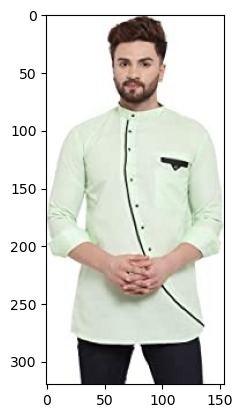

In [327]:
kurta_men1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/35909.jpeg')
_ = plt.imshow(kurta_men1)

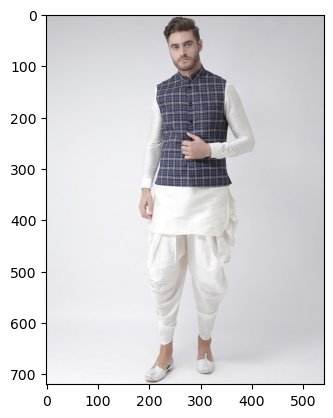

In [328]:
kurta_men2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/42857.jpeg')
_ = plt.imshow(kurta_men2)

In [329]:
kurta_men2.shape

(720, 540, 3)

## Exploring the pictures and sizes of images of dupattas

In [330]:
df_train[df_train['class_label'] == 'dupattas']

image_url  \
24110  https://m.media-amazon.com/images/I/81MM7f4lUA...   
24111  https://m.media-amazon.com/images/I/61rNOS3TCe...   
24112  https://m.media-amazon.com/images/I/81i-miJDsV...   
24113  https://m.media-amazon.com/images/I/61zTDEXy3i...   
24114  https://m.media-amazon.com/images/I/91kN1B51sF...   
...                                                  ...   
30692  https://rukminim1.flixcart.com/image/309/371/k...   
30693  https://rukminim1.flixcart.com/image/309/371/k...   
30694  https://rukminim1.flixcart.com/image/309/371/k...   
30695  https://rukminim1.flixcart.com/image/309/371/k...   
30696  https://rukminim1.flixcart.com/image/309/371/k...   

                    image_path                 brand  \
24110  images/train/24110.jpeg               M7STORE   
24111  images/train/24111.jpeg               Generic   
24112  images/train/24112.jpeg  Abdul salam and sons   
24113  images/train/24113.jpeg       Weaving Wonders   
24114  images/train/24114.jpeg       Nakoda Creation   
...                        ...                   ...   
30692  images/train/30692.jpeg            Lady Shopi   
30693  images/train/30693.jpeg                caaspy   
30694  images/train/30694.jpeg       Nakoda Creation   
30695  images/train/30695.jpeg            walk heart   
30696  images/train/30696.jpeg               SANZARI   

                                           product_title class_label color  
24110  Women's Embroidered Chanderi Dupatta (M7-D005_...    dupattas   NaN  
24111  Women's Self Design Art Silk Dupatta (BSD001_P...    dupattas   NaN  
24112  Women's Cotton Banarasi Cotton Dupatta (ASS09 ...    dupattas   NaN  
24113  Women's Cotton Silk Dupattas (VE11093-C, Power...    dupattas   NaN  
24114  Women's Dupatta (Pack of 7) (Cotton Printed_Mu...    dupattas   NaN  
...                                                  ...         ...   ...  
30692             Cotton Blend Printed Red Women Dupatta    dupattas   N/A  
30693        Cotton Blend Solid Red, White Women Dupatta    dupattas   N/A  
30694          Pure Cotton Checkered Green Women Dupatta    dupattas   N/A  
30695               Linen Blend Solid Pink Women Dupatta    dupattas   N/A  
30696                 Net Embellished Pink Women Dupatta    dupattas   N/A  

[6587 rows x 6 columns]

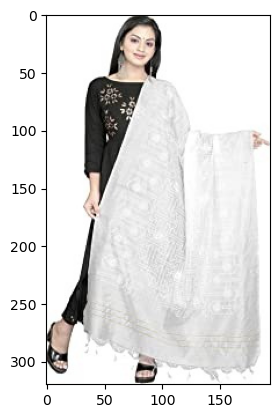

In [331]:
dupatta1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/24110.jpeg')
_ = plt.imshow(dupatta1)

In [332]:
dupatta1.shape

(320, 194, 3)

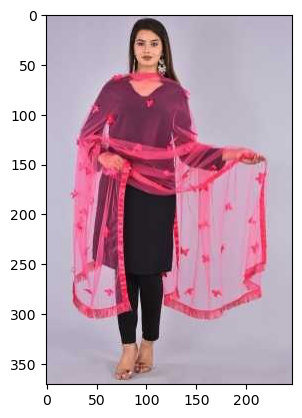

In [333]:
dupatta2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/30696.jpeg')
_ = plt.imshow(dupatta2)

In [334]:
dupatta2.shape

(371, 247, 3)

## Exploring the pictures and sizes of images of nehru jackets

In [335]:
df_train[df_train.class_label == 'nehru_jackets']

image_url  \
62173  https://m.media-amazon.com/images/I/81N5b5OW+7...   
62174  https://m.media-amazon.com/images/I/714UHYaGgf...   
62175  https://m.media-amazon.com/images/I/71aM5W8sok...   
62176  https://m.media-amazon.com/images/I/81sIS48Pvs...   
62177  https://m.media-amazon.com/images/I/413OZ0CF0u...   
...                                                  ...   
68659  https://assets0.mirraw.com/images/7996674/imag...   
68660  https://assets0.mirraw.com/images/6802903/imag...   
68661  https://assets0.mirraw.com/images/6802891/imag...   
68662  https://assets0.mirraw.com/images/6810812/imag...   
68663  https://assets0.mirraw.com/images/6810787/imag...   

                    image_path          brand  \
62173  images/train/62173.jpeg        UNCRAZY   
62174  images/train/62174.jpeg        UNCRAZY   
62175  images/train/62175.jpeg     ESSENTIELE   
62176  images/train/62176.jpeg  BIS Creations   
62177  images/train/62177.jpeg         hangup   
...                        ...            ...   
68659  images/train/68659.jpeg         Mirraw   
68660  images/train/68660.jpeg         Mirraw   
68661  images/train/68661.jpeg         Mirraw   
68662  images/train/68662.jpeg         Mirraw   
68663  images/train/68663.jpeg         Mirraw   

                                           product_title    class_label color  
62173  Men's Jute Regular Fit Sleeveless Solid Nehru ...  nehru_jackets   NaN  
62174  Men's Jute Regular Fit Sleeveless Solid Nehru ...  nehru_jackets   NaN  
62175  Men's Black Grey Checkered Wool Bandhgala Ethn...  nehru_jackets   NaN  
62176                          Men's Cotton Blend Jacket  nehru_jackets   NaN  
62177                         Men's synthetic Waist Coat  nehru_jackets   NaN  
...                                                  ...            ...   ...  
68659                  Black Printed Cotton Nehru Jacket  nehru_jackets   NaN  
68660          Multicolor Printed Polyester Nehru Jacket  nehru_jackets   NaN  
68661               White Printed Polyester Nehru Jacket  nehru_jackets   NaN  
68662                Yellow Woven Polyester Nehru Jacket  nehru_jackets   NaN  
68663                 Brown Woven Polyester Nehru Jacket  nehru_jackets   NaN  

[6491 rows x 6 columns]

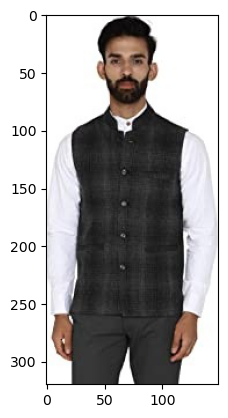

In [336]:
nehru_jackets1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/62175.jpeg')
_ = plt.imshow(nehru_jackets1)

In [337]:
nehru_jackets1.shape

(320, 149, 3)

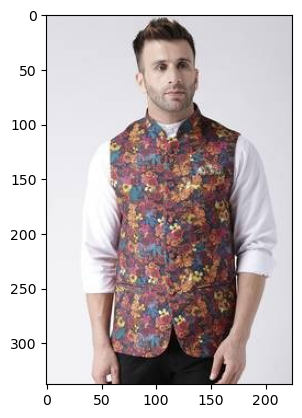

In [338]:
nehru_jackets2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/68660.jpeg')
_ = plt.imshow(nehru_jackets2)

In [339]:
nehru_jackets2.shape

(338, 225, 3)

## Exploring the pictures and sizes of images of lehengas

In [340]:
df_train[df_train.class_label == 'lehenga']

image_url  \
50646  https://m.media-amazon.com/images/I/519cg84PBk...   
50647  https://m.media-amazon.com/images/I/41tAwKQRNU...   
50648  https://m.media-amazon.com/images/I/61r-dWkdOI...   
50649  https://m.media-amazon.com/images/I/71l5l+upXA...   
50650  https://m.media-amazon.com/images/I/71H5s+Nn1K...   
...                                                  ...   
56394  https://assets0.mirraw.com/images/6532980/imag...   
56395  https://assets0.mirraw.com/images/6532993/imag...   
56396  https://assets0.mirraw.com/images/7277550/imag...   
56397  https://assets0.mirraw.com/images/7292678/imag...   
56398  https://assets0.mirraw.com/images/7510507/imag...   

                    image_path              brand  \
50646  images/train/50646.jpeg              FEXEL   
50647  images/train/50647.jpeg  TWISHA ENTERPRISE   
50648  images/train/50648.jpeg      Lehenga Style   
50649  images/train/50649.jpeg      Lehenga Style   
50650  images/train/50650.jpeg         Bollyclues   
...                        ...                ...   
56394  images/train/56394.jpeg             Mirraw   
56395  images/train/56395.jpeg             Mirraw   
56396  images/train/56396.jpeg             Mirraw   
56397  images/train/56397.jpeg             Mirraw   
56398  images/train/56398.jpeg             Mirraw   

                                           product_title class_label color  
50646  Women's Velvet Semi-stitched Lehenga Choli (VC...     lehenga   NaN  
50647  Tissue Net Embroidered Lahenga Choli Dupata - ...     lehenga   NaN  
50648  Women's Heavy Net Embroidery Semi-stitched Leh...     lehenga   NaN  
50649  Women's Silk Semi-stitched Lehenga Choli (MF-6...     lehenga   NaN  
50650  Women's Net Embroidered Semi-Stitched Lehenga ...     lehenga   NaN  
...                                                  ...         ...   ...  
56394  Beige Embroidered Net Semi Stitched Lehenga Wi...     lehenga   NaN  
56395  Pink Embroidered Silk Semi Stitched Lehenga Wi...     lehenga   NaN  
56396      Yellow Embroidered Silk Semi Stitched Lehenga     lehenga   NaN  
56397   Sea-Green Embroidered Silk Semi Stitched Lehenga     lehenga   NaN  
56398      Beige Embroidered Satin Semi Stitched Lehenga     lehenga   NaN  

[5753 rows x 6 columns]

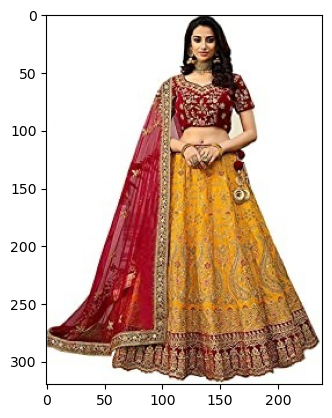

In [341]:
lehenga1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/50649.jpeg')
_ = plt.imshow(lehenga1)

In [342]:
lehenga1.shape

(320, 239, 3)

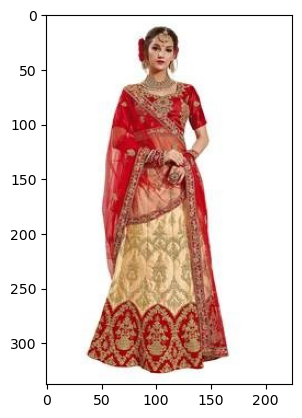

In [343]:
lehenga2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/56398.jpeg')
_ = plt.imshow(lehenga2)

In [344]:
lehenga2.shape

(338, 225, 3)

## Exploring the pictures and sizes of images of gowns

In [345]:
df_train[df_train.class_label == 'gowns']

image_url  \
30697  https://m.media-amazon.com/images/I/71Yc3-8MbB...   
30698  https://m.media-amazon.com/images/I/61A5P4GcDf...   
30699  https://m.media-amazon.com/images/I/61dlrIaTDT...   
30700  https://m.media-amazon.com/images/I/714D5kTPK+...   
30701  https://m.media-amazon.com/images/I/71oiQBgERc...   
...                                                  ...   
35903  https://rukminim1.flixcart.com/image/309/371/k...   
35904  https://rukminim1.flixcart.com/image/309/371/k...   
35905  https://rukminim1.flixcart.com/image/309/371/k...   
35906  https://rukminim1.flixcart.com/image/309/371/k...   
35907  https://rukminim1.flixcart.com/image/309/371/k...   

                    image_path              brand  \
30697  images/train/30697.jpeg           Shehzadi   
30698  images/train/30698.jpeg     Smily Creation   
30699  images/train/30699.jpeg        Fashion Web   
30700  images/train/30700.jpeg         Bollyclues   
30701  images/train/30701.jpeg           Shehzadi   
...                        ...                ...   
35903  images/train/35903.jpeg  AADVIKA CREATIONS   
35904  images/train/35904.jpeg    aakritifashions   
35905  images/train/35905.jpeg   The Fashion Shop   
35906  images/train/35906.jpeg        BEELEE TYPS   
35907  images/train/35907.jpeg         PCDESIGNER   

                                           product_title class_label  \
30697  Women's Fit And Flare Maxi Gown (Teal Blue_XX-...       gowns   
30698  Women's Taffeta Silk Embroidered Long Anarkali...       gowns   
30699  Women's Velvet Sequins Semi-Stitched Anarkali ...       gowns   
30700  Women's Mono Net Embroidered Pink Semi Stitch ...       gowns   
30701  Women's Full Stiched Gown Silk Sungudi South I...       gowns   
...                                                  ...         ...   
35903                 Rayon Blend Stitched Anarkali Gown       gowns   
35904    Printed Crepe Blend Stitched Flared/A-line Gown       gowns   
35905  Embroidered Pure Georgette Semi Stitched Anark...       gowns   
35906  Printed Georgette Blend Stitched Flared/A-line...       gowns   
35907             Georgette Blend Stitched Anarkali Gown       gowns   

            color  
30697         NaN  
30698         NaN  
30699         NaN  
30700         NaN  
30701         NaN  
...           ...  
35903        Pink  
35904        Pink  
35905  Dark Green  
35906       White  
35907       Black  

[5211 rows x 6 columns]

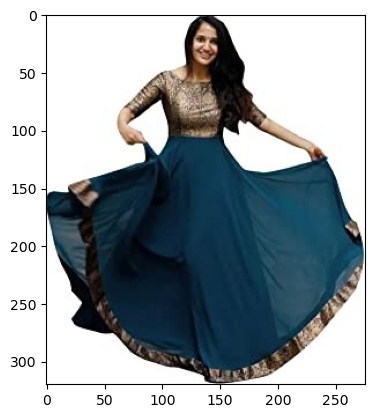

In [346]:
gown1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/30697.jpeg')
_ = plt.imshow(gown1)

In [347]:
gown1.shape

(320, 276, 3)

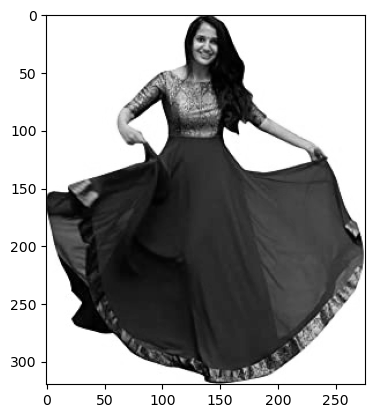

In [348]:
gown1_gray = color.rgb2gray(gown1)
_ = plt.imshow(gown1_gray, cmap='gray')

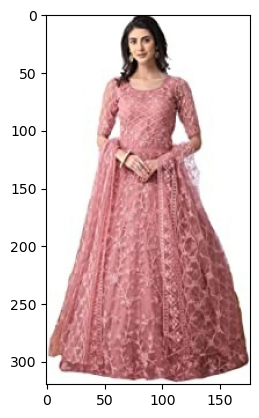

In [349]:
gown2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/30700.jpeg')
_ = plt.imshow(gown2)

In [350]:
gown2.shape

(320, 176, 3)

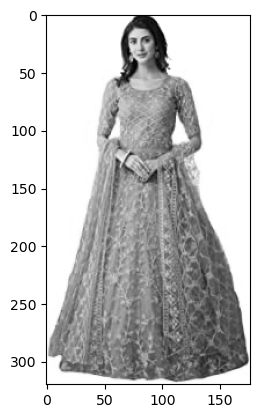

In [351]:
gown2_gray = color.rgb2gray(gown2)
_ = plt.imshow(gown2_gray, cmap='gray')

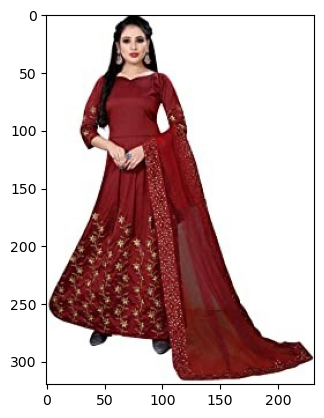

In [352]:
gown3 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/35000.jpeg')
_ = plt.imshow(gown3)

In [353]:
gown3.shape

(320, 232, 3)

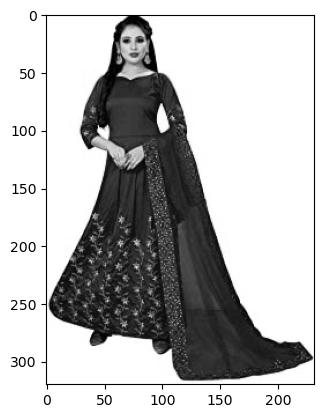

In [354]:
gown3_gray = color.rgb2gray(gown3)
_ = plt.imshow(gown3_gray, cmap='gray')

## Exploring the pictures and sizes of images of petticoats

In [355]:
df_train[df_train.class_label == 'petticoats']

image_url  \
72039  https://m.media-amazon.com/images/I/51j54vyvFn...   
72040  https://m.media-amazon.com/images/I/7185GWwzJb...   
72041  https://m.media-amazon.com/images/I/31s0u3ztG0...   
72042  https://m.media-amazon.com/images/I/61DNNw4mmj...   
72043  https://m.media-amazon.com/images/I/61QpwNUNkn...   
...                                                  ...   
76475                                                N/A   
76476                                                N/A   
76477                                                N/A   
76478                                                N/A   
76479                                                N/A   

                    image_path        brand  \
72039  images/train/72039.jpeg   Silvermist   
72040  images/train/72040.jpeg  The Crafted   
72041  images/train/72041.jpeg  RB Creation   
72042  images/train/72042.jpeg      Generic   
72043  images/train/72043.jpeg      UTHAMMA   
...                        ...          ...   
76475  images/train/76475.jpeg          N/A   
76476  images/train/76476.jpeg          N/A   
76477  images/train/76477.jpeg          N/A   
76478  images/train/76478.jpeg          N/A   
76479   images/train/76479.jpg          N/A   

                                           product_title class_label color  
72039                 Women Cotton Petticoat (Free-Size)  petticoats   NaN  
72040  Women's Pure Cotton Readymade Inskirt Saree Pe...  petticoats   NaN  
72041                           Women's Cotton Petticoat  petticoats   NaN  
72042  POOJARAN Saree Microfiber Saree Shapewear Pett...  petticoats   NaN  
72043               Microfiber Saree Shapewear For Women  petticoats   NaN  
...                                                  ...         ...   ...  
76475                                                N/A  petticoats   NaN  
76476                                                N/A  petticoats   NaN  
76477                                                N/A  petticoats   NaN  
76478                                                N/A  petticoats   NaN  
76479                                                N/A  petticoats   NaN  

[4441 rows x 6 columns]

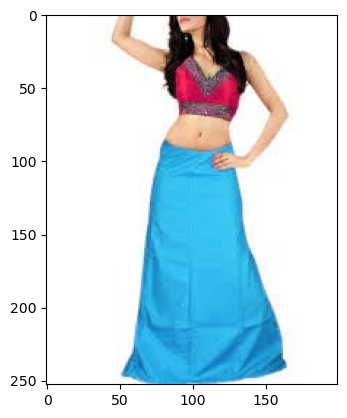

In [356]:
petticoat1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/76476.jpeg')
_ = plt.imshow(petticoat1)

In [357]:
petticoat1.shape

(253, 199, 3)

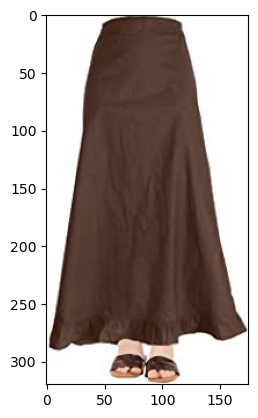

In [358]:
petticoat2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/72039.jpeg')
_ = plt.imshow(petticoat2)

In [359]:
petticoat2.shape

(320, 175, 3)

## Exploring the pictures and sizes of images of dhoti pants

In [360]:
df_train[df_train.class_label == 'dhoti_pants']

image_url  \
19965  https://m.media-amazon.com/images/I/71+A1nj38K...   
19966  https://m.media-amazon.com/images/I/61sHcHbuyr...   
19967  https://m.media-amazon.com/images/I/81gGQT1gdW...   
19968  https://m.media-amazon.com/images/I/61wbLIc0mR...   
19969  https://m.media-amazon.com/images/I/61C3xbXRV-...   
...                                                  ...   
24105  https://assets.myntassets.com/h_720,q_90,w_540...   
24106  https://assets.myntassets.com/h_720,q_90,w_540...   
24107  https://assets.myntassets.com/h_720,q_90,w_540...   
24108  https://assets.myntassets.com/h_720,q_90,w_540...   
24109  https://assets.myntassets.com/h_720,q_90,w_540...   

                    image_path                 brand  \
19965  images/train/19965.jpeg       Buy That Trendz   
19966  images/train/19966.jpeg       Buy That Trendz   
19967  images/train/19967.jpeg       Buy That Trendz   
19968  images/train/19968.jpeg                  LYOS   
19969  images/train/19969.jpeg             Faunashaw   
...                        ...                   ...   
24105  images/train/24105.jpeg  Melange by Lifestyle   
24106  images/train/24106.jpeg          Jaipur Kurti   
24107  images/train/24107.jpeg                I Know   
24108  images/train/24108.jpeg                Castle   
24109  images/train/24109.jpeg                 INDYA   

                                           product_title  class_label color  
19965                                  Women Harem Pants  dhoti_pants   NaN  
19966  Womens Cotton Viscose Lycra Dhoti Patiyala Sal...  dhoti_pants   NaN  
19967  Combo Offer (Pack of 3) Cotton Viscose Lycra D...  dhoti_pants   NaN  
19968                    Women's Regular Fit Dhoti Pants  dhoti_pants   NaN  
19969  Women Stylish Dhoti Pants Salwar Bottom Wear F...  dhoti_pants   NaN  
...                                                  ...          ...   ...  
24105                        Women Red Solid Dhoti Pants  dhoti_pants   NaN  
24106                             Women Navy Dhoti Pants  dhoti_pants   NaN  
24107                  Men Black Solid Dupion Silk Dhoti  dhoti_pants   NaN  
24108  Women Black &amp; Gold-Coloured Striped Dhoti ...  dhoti_pants   NaN  
24109  X PAYAL SINGHAL Women Green Solid Dhoti Pants ...  dhoti_pants   NaN  

[4145 rows x 6 columns]

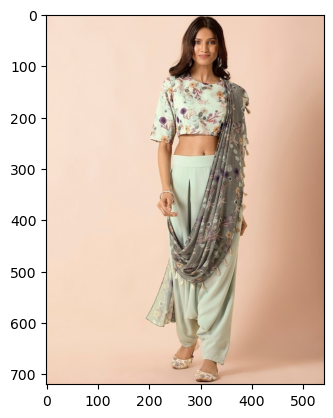

In [361]:
dhoti_pants1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/24109.jpeg')
_ = plt.imshow(dhoti_pants1)

In [362]:
dhoti_pants1.shape

(720, 540, 3)

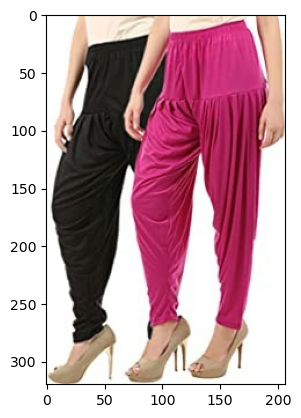

In [363]:
dhoti_pants2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/19966.jpeg')
_ = plt.imshow(dhoti_pants2)

In [364]:
dhoti_pants2.shape

(320, 207, 3)

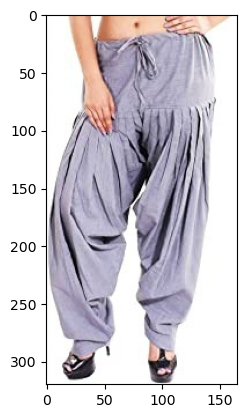

In [365]:
dhoti_pants3 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/22000.jpeg')
_ = plt.imshow(dhoti_pants3)

In [366]:
dhoti_pants3.shape

(320, 165, 3)

## Exploring the pictures and sizes of images of palazzos

In [367]:
df_train[df_train.class_label == 'palazzos']

image_url  \
68664  https://m.media-amazon.com/images/I/715CMJQaHX...   
68665  https://m.media-amazon.com/images/I/81BY5NdkKS...   
68666  https://m.media-amazon.com/images/I/51SUSdNQkT...   
68667  https://m.media-amazon.com/images/I/5175NBo66-...   
68668  https://m.media-amazon.com/images/I/71vkLaq+Td...   
...                                                  ...   
72034  https://img6.craftsvilla.com/image/upload/w_30...   
72035  https://img6.craftsvilla.com/image/upload/w_30...   
72036  https://img6.craftsvilla.com/image/upload/w_30...   
72037  https://img6.craftsvilla.com/image/upload/w_30...   
72038  https://img6.craftsvilla.com/image/upload/w_30...   

                    image_path            brand  \
68664  images/train/68664.jpeg          Generic   
68665  images/train/68665.jpeg             pdpm   
68666  images/train/68666.jpeg      RJ CREATION   
68667  images/train/68667.jpeg          Generic   
68668  images/train/68668.jpeg  Co-Ords Fashion   
...                        ...              ...   
72034   images/train/72034.jpg      Craftsvilla   
72035   images/train/72035.jpg      Craftsvilla   
72036   images/train/72036.jpg      Craftsvilla   
72037   images/train/72037.jpg      Craftsvilla   
72038   images/train/72038.jpg      Craftsvilla   

                                          product_title class_label color  
68664           Women's Regular Fit Palazzo (Pack of 2)    palazzos   NaN  
68665                    Women's Palazzo Shimmer (Gold)    palazzos   NaN  
68666  Fashion Women's Regular Fit Palazzos (Pack of 2)    palazzos   NaN  
68667                   Jocote Crush Palazzo with Beeds    palazzos   NaN  
68668                       Women's Palazzo (Pack of 2)    palazzos   NaN  
...                                                 ...         ...   ...  
72034                                   Clora White ...    palazzos   NaN  
72035                              Clora Peach Full ...    palazzos   NaN  
72036                               Clora Navy Blue ...    palazzos   NaN  
72037                              Clora Grey Solid ...    palazzos   NaN  
72038                               Clora Off-white ...    palazzos   NaN  

[3375 rows x 6 columns]

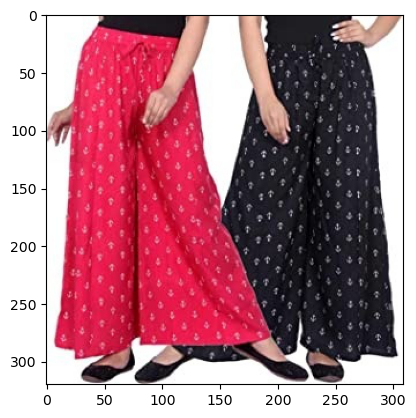

In [368]:
palazzos1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/68664.jpeg')
_ = plt.imshow(palazzos1)

In [369]:
palazzos1.shape

(320, 309, 3)

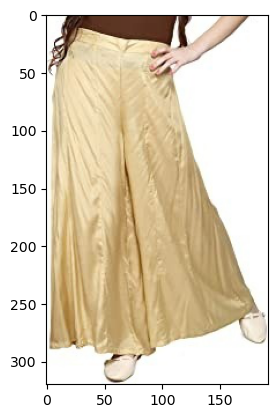

In [370]:
palazzos2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/68665.jpeg')
_ = plt.imshow(palazzos2)

In [371]:
palazzos2.shape

(320, 192, 3)

## Exploring the pictures and sizes of images of mojaris for women

In [372]:
df_train[df_train.class_label == 'mojaris_women']

image_url  \
58945  https://m.media-amazon.com/images/I/615mPakMqS...   
58946  https://m.media-amazon.com/images/I/71XrCM2df0...   
58947  https://m.media-amazon.com/images/I/61glP6h+f4...   
58948  https://m.media-amazon.com/images/I/61L-TVr9m5...   
58949  https://m.media-amazon.com/images/I/81noZS5RO0...   
...                                                  ...   
62168                                                N/A   
62169                                                N/A   
62170                                                N/A   
62171                                                N/A   
62172                                                N/A   

                    image_path            brand  \
58945  images/train/58945.jpeg  RSK Ethnic Wear   
58946  images/train/58946.jpeg             Nakh   
58947  images/train/58947.jpeg  RSK Ethnic Wear   
58948  images/train/58948.jpeg          Generic   
58949  images/train/58949.jpeg          Generic   
...                        ...              ...   
62168  images/train/62168.jpeg              N/A   
62169  images/train/62169.jpeg              N/A   
62170  images/train/62170.jpeg              N/A   
62171  images/train/62171.jpeg              N/A   
62172  images/train/62172.jpeg              N/A   

                                           product_title    class_label color  
58945                                      Women's Jutti  mojaris_women   NaN  
58946  Women Ethnic Mojari Jutti Pearl and Sequins Wo...  mojaris_women   NaN  
58947                                      Women's Jutti  mojaris_women   NaN  
58948  RMH Women's Ethnic Rajasthani Handmade Jutti/M...  mojaris_women   NaN  
58949                         Women's White Mojari -7 UK  mojaris_women   NaN  
...                                                  ...            ...   ...  
62168                                                N/A  mojaris_women   NaN  
62169                                                N/A  mojaris_women   NaN  
62170                                                N/A  mojaris_women   NaN  
62171                                                N/A  mojaris_women   NaN  
62172                                                N/A  mojaris_women   NaN  

[3228 rows x 6 columns]

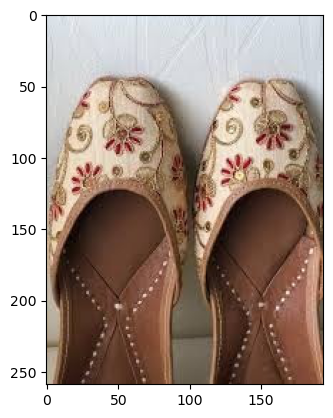

In [373]:
mojaris_women1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/62172.jpeg')
_ = plt.imshow(mojaris_women1)

In [374]:
mojaris_women1.shape

(259, 194, 3)

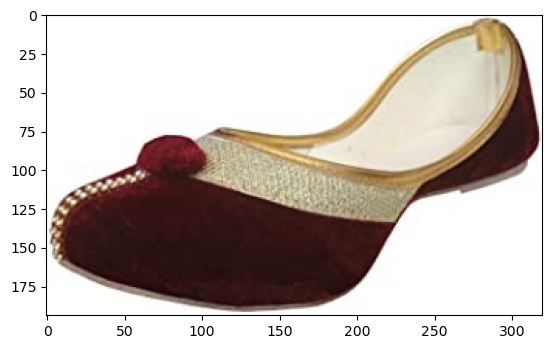

In [375]:
mojaris_women2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/60000.jpeg')
_ = plt.imshow(mojaris_women2)

In [376]:
mojaris_women2.shape

(194, 320, 3)

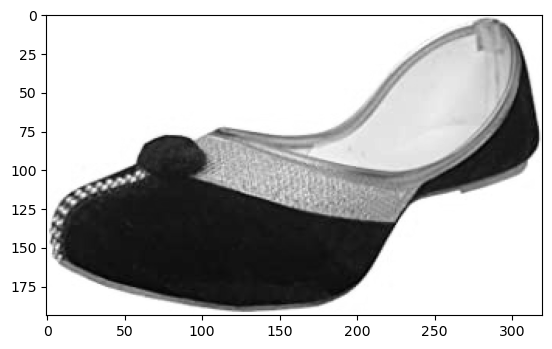

In [377]:
mojaris_women2_gray = color.rgb2gray(mojaris_women2)
_ = plt.imshow(mojaris_women2_gray, cmap='gray')

## Exploring the pictures and sizes of images of sherwanis

In [378]:
df_train[df_train.class_label == 'sherwanis']

image_url  \
76480  https://m.media-amazon.com/images/I/61U7wkNj9V...   
76481  https://m.media-amazon.com/images/I/61t-vyO4IW...   
76482  https://m.media-amazon.com/images/I/715Q0ypo2L...   
76483  https://m.media-amazon.com/images/I/51XtyX5YCg...   
76484  https://m.media-amazon.com/images/I/811AqOaIP1...   
...                                                  ...   
79467                                                N/A   
79468                                                N/A   
79469                                                N/A   
79470                                                N/A   
79471                                                N/A   

                    image_path          brand  \
76480  images/train/76480.jpeg   SG RAJASAHAB   
76481  images/train/76481.jpeg   SG RAJASAHAB   
76482  images/train/76482.jpeg        Krypmax   
76483  images/train/76483.jpeg         Amzira   
76484  images/train/76484.jpeg  N.B.F Fashion   
...                        ...            ...   
79467   images/train/79467.jpg            N/A   
79468   images/train/79468.jpg            N/A   
79469  images/train/79469.jpeg            N/A   
79470  images/train/79470.jpeg            N/A   
79471  images/train/79471.jpeg            N/A   

                                           product_title class_label color  
76480                         Sherwani For Men(UP-13235)   sherwanis   NaN  
76481                       Sherwani For Men (UP-SBH137)   sherwanis   NaN  
76482      Men's Velvet Sherwani Dupatta (Maroon, 2.5 m)   sherwanis   NaN  
76483  Men's Traditional Sherwani Indian Wedding Dres...   sherwanis   NaN  
76484  Men's Traditional Sherwani Indian Wedding Dres...   sherwanis   NaN  
...                                                  ...         ...   ...  
79467                                                N/A   sherwanis   NaN  
79468                                                N/A   sherwanis   NaN  
79469                                                N/A   sherwanis   NaN  
79470                                                N/A   sherwanis   NaN  
79471                                                N/A   sherwanis   NaN  

[2992 rows x 6 columns]

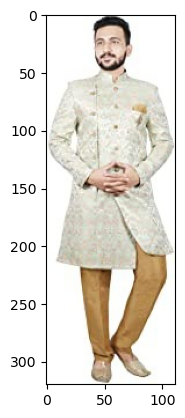

In [379]:
sherwanis1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/76480.jpeg')
_ = plt.imshow(sherwanis1)

In [380]:
sherwanis1.shape

(320, 111, 3)

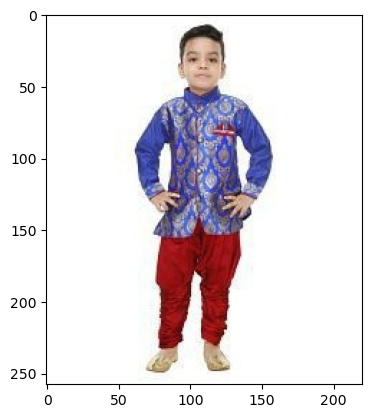

In [381]:
sherwanis2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/79471.jpeg')
_ = plt.imshow(sherwanis2)

In [382]:
sherwanis2.shape

(258, 220, 3)

## Exploring the pictures and sizes of images of mojaris for men

In [383]:
df_train[df_train.class_label == 'mojaris_men']

image_url  \
56399  https://m.media-amazon.com/images/I/51ZmusA7JH...   
56400  https://m.media-amazon.com/images/I/615nKOHMxI...   
56401  https://m.media-amazon.com/images/I/71y6xVoQUx...   
56402  https://m.media-amazon.com/images/I/91wBJ1emZq...   
56403  https://m.media-amazon.com/images/I/61eSHQe47d...   
...                                                  ...   
58940                                                N/A   
58941                                                N/A   
58942                                                N/A   
58943                                                N/A   
58944                                                N/A   

                    image_path               brand         product_title  \
56399  images/train/56399.jpeg           A-Fashion          Men's Mojari   
56400  images/train/56400.jpeg              FAUSTO          Men's Loafer   
56401  images/train/56401.jpeg           Flooristo          Men's Mojari   
56402  images/train/56402.jpeg  Unique World Trade  Men's & Boy's Mojari   
56403  images/train/56403.jpeg            Prolific          Men's Mojari   
...                        ...                 ...                   ...   
58940  images/train/58940.jpeg                 N/A                   N/A   
58941  images/train/58941.jpeg                 N/A                   N/A   
58942  images/train/58942.jpeg                 N/A                   N/A   
58943  images/train/58943.jpeg                 N/A                   N/A   
58944  images/train/58944.jpeg                 N/A                   N/A   

       class_label color  
56399  mojaris_men   NaN  
56400  mojaris_men   NaN  
56401  mojaris_men   NaN  
56402  mojaris_men   NaN  
56403  mojaris_men   NaN  
...            ...   ...  
58940  mojaris_men   NaN  
58941  mojaris_men   NaN  
58942  mojaris_men   NaN  
58943  mojaris_men   NaN  
58944  mojaris_men   NaN  

[2546 rows x 6 columns]

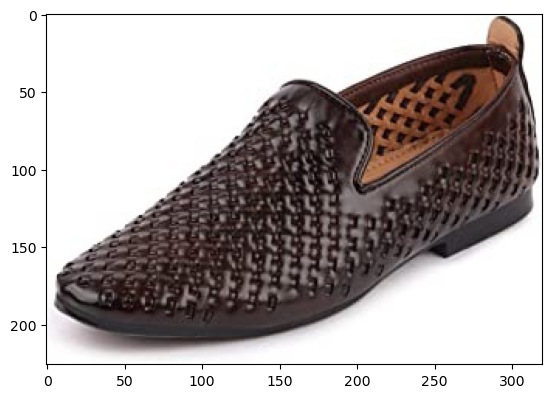

In [384]:
mojaris_men1 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/56400.jpeg')
_ = plt.imshow(mojaris_men1)

In [385]:
mojaris_men1.shape

(226, 320, 3)

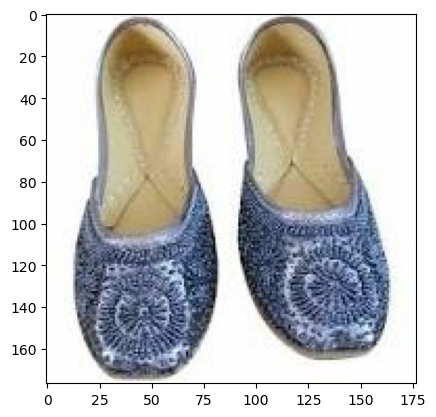

In [386]:
mojaris_men2 = imageio.imread('/Users/butler/Documents/hp/Retrieval_of_Indian_clothing_images/data/raw/indian_clothing/images/train/58942.jpeg')
_ = plt.imshow(mojaris_men2)

In [387]:
mojaris_men2.shape

(177, 177, 3)

## Important take-aways from EDA:
### - The images in the training set have different sizes, which must be dealt with in pre-processing
### - Some of the images for mojaris for men and mojaris for women are quite similar
### - Dothi pants and salwars are difficult to tell apart
